# Diet logging dataset  

### Description

Diet logging using a smartphone app involves collecting data on food and drink consumption through a mobile application. These data include information such as types of food, serving sizes, nutritional information and the times of consumption. The data is used to track dietary habits and can be used in scientific research to gain insights into the dietary habits of a population and to correlate to other temporal measurements and events.

### Introduction

There is a strong relationship between the development of chronic disease and a person’s diet. Adults who eat a healthy diet are more likely to live longer and are less likely to develop chronic disease or become obese. An unhealthy diet is a major risk factor for type 2 diabetes, cardiovascular disease and certain types of cancer. Consuming a nutrient-dense diet was associated with a low risk of all-cause mortality.

Nutritional epidemiology is a sub-discipline of epidemiology that provides data about the relationship between diet and disease. The data collected is used to define diet–disease associations that are converted into the practice of prevention by public-health nutrition practitioners. To study the associations between diet and disease, there is a need to accurately characterize the dietary habits of individuals. One approach is to use a food diary, which is a daily log of what an individual eats and drinks. Such diaries are used to characterize eating habits in large and small epidemiological studies. Owing to recent technological advancements and the vast availability of smartphones, nutrition-related apps are commonly used to track dietary behavior.

### Measurement protocol 
<!-- long measurment protocol for the data browser -->
Participants in the Human Phenotype Project are asked to log their food for a period of at least two weeks following each visit to the assessment center or a followup call. The figure below shows the process of logging a food item through the diet logging app.

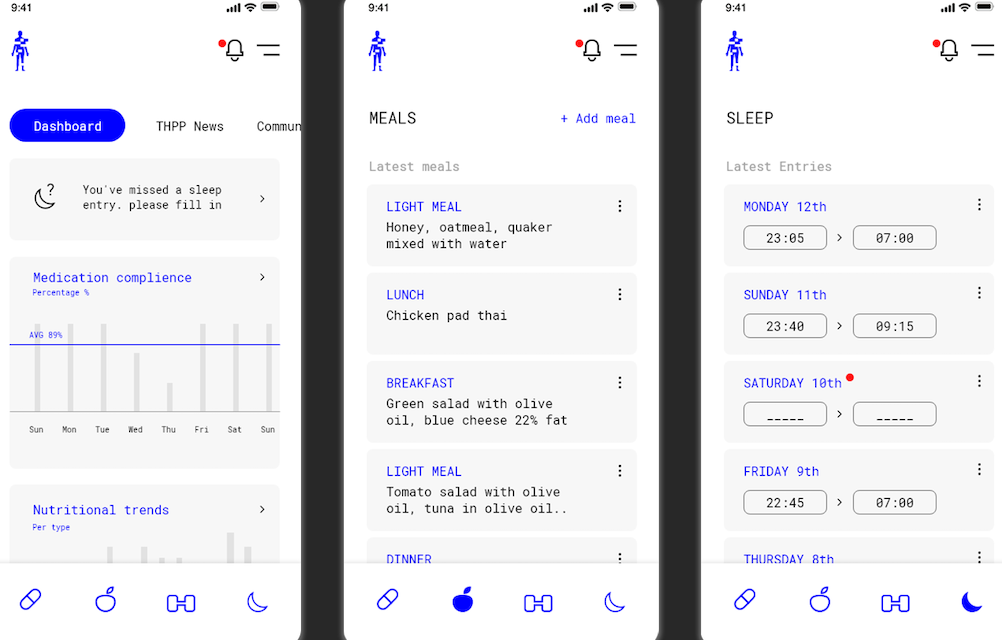

Participants are asked to download the app and start logging data one day before the visit to the assessment center. Participants are asked to log everything they eat and drink and to include as one “meal” all the items they have consumed within a 30 minute interval. While participants are asked to log their meals for at least 14 days after each visit, the logging app is open for the whole study period and participants are encouraged to document their diets beyond this time. 


### Data availability:  
<!-- for the example notebooks -->
The information is stored in 3 parquet files: `diet_logging.parquet`, `diet_logging_events.parquet`,  `raw_diet_logging_events.parquet `which contains summary information, processed diet logging data and raw diet logging data respectively.

### Relevant links

* [Pheno Knowledgebase](https://knowledgebase.pheno.ai/datasets/005-diet_logging.html)
* [Pheno Data Browser](https://pheno-demo-app.vercel.app/folder/5)


In [1]:
%load_ext autoreload
%autoreload 2

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
import pandas as pd

from pheno_utils import PhenoLoader

In [2]:
pl = PhenoLoader('diet_logging', age_sex_dataset=None, base_path='s3://pheno-synthetic-data/data')
pl

PhenoLoader for diet_logging with
8 fields
1 tables: ['diet_logging']

# Data dictionary

In [ ]:
pl.dict.head()

,Unnamed: 0,field_string,description_string,customer_field,folder_id,feature_set,field_type,strata,data_coding,array,...,completed,browser_image_label,browser_image_caption,browser_image_fname,index_field,item_type,instances,participants,parent_dataframe,version
tabular_field_name,,,,,,,,,,,,,,,,,,,,,
collection_timestamp,0,Collection timestamp,Collection timestamp,ready,5.0,diet_logging,Date,Collection time,NaN,Single,...,NaN,NaN,NaN,NaN,True,Data,Variable,NaN,NaN,NaN
collection_date,1,Date,Datetime column relecting the time food item w...,ready,5.0,diet_logging,Datetime,Collection time,NaN,Single,...,NaN,NaN,NaN,NaN,NaN,Data,Variable,NaN,NaN,NaN
logging_day,2,Logging day per participant,Integer indicating which day of logging period,ready,5.0,diet_logging_events,Integer,Primary,NaN,Single,...,NaN,NaN,NaN,NaN,True,Data,Variable,NaN,NaN,NaN
total_logging_days,3,Total number of days logged,Total number of days diet was logged per resea...,ready,5.0,diet_logging,Integer,Primary,NaN,Single,...,NaN,NaN,NaN,NaN,NaN,Data,Variable,NaN,NaN,NaN
timezone,4,Timezone,Timezone,ready,5.0,diet_logging,Text,Collection time,NaN,Single,...,NaN,NaN,NaN,NaN,NaN,Data,Defined,NaN,NaN,NaN


# Load data

Load all fields from the main table:

In [ ]:
pl[pl.fields].head()

1	bulk fields found in diet_logging_events


age  \
participant_id cohort research_stage array_index         
2869902522     10k    03_00_call     0            48.7   
                                     1            48.7   
                                     2            48.7   
                                     3            48.7   
                                     4            48.7   

                                                                                diet_logging_events  \
participant_id cohort research_stage array_index                                                      
2869902522     10k    03_00_call     0            s3://pheno-synthetic-data/data/diet_logging/di...   
                                     1            s3://pheno-synthetic-data/data/diet_logging/di...   
                                     2            s3://pheno-synthetic-data/data/diet_logging/di...   
                                     3            s3://pheno-synthetic-data/data/diet_logging/di...   
                                     4            s3://pheno-synthetic-data/data/diet_logging/di...   

                                                  food_items  \
participant_id cohort research_stage array_index               
2869902522     10k    03_00_call     0                    23   
                                     1                    15   
                                     2                    20   
                                     3                    24   
                                     4                     8   

                                                                            raw_diet_logging_events  \
participant_id cohort research_stage array_index                                                      
2869902522     10k    03_00_call     0            s3://pheno-synthetic-data/data/diet_logging/ra...   
                                     1            s3://pheno-synthetic-data/data/diet_logging/ra...   
                                     2            s3://pheno-synthetic-data/data/diet_logging/ra...   
                                     3            s3://pheno-synthetic-data/data/diet_logging/ra...   
                                     4            s3://pheno-synthetic-data/data/diet_logging/ra...   

                                                 sex  total_logging_days  \
participant_id cohort research_stage array_index                           
2869902522     10k    03_00_call     0             1                   7   
                                     1             1                   7   
                                     2             1                   7   
                                     3             1                   7   
                                     4             1                   7   

                                                                             usda_sf_legacy_mapping  
participant_id cohort research_stage array_index                                                     
2869902522     10k    03_00_call     0            s3:///pheno-synthetic-data/data/diet_logging/s...  
                                     1            s3:///pheno-synthetic-data/data/diet_logging/s...  
                                     2            s3:///pheno-synthetic-data/data/diet_logging/s...  
                                     3            s3:///pheno-synthetic-data/data/diet_logging/s...  
                                     4            s3:///pheno-synthetic-data/data/diet_logging/s...

Load all diet logs from the 14 days following each visit to the research center, for all participants:
(Note that for some participants days have been filtered during QC.)

In [ ]:
events_df_all = pl.load_bulk_data('diet_logging_events')
events_df_all.head()

/home/ec2-user/miniconda3/lib/python3.11/site-packages/pheno_utils/pheno_loader.py:525: UserWarning: Fields not found: ['collection_date']
  warnings.warn(f'Fields not found: {not_found}')


collection_date  \
participant_id cohort research_stage array_index logging_day collection_timestamp      food_id                   
2869902522     10k    03_00_call     0           1           2022-07-13 08:42:00+03:00 1007294      2022-07-13   
                                                                                       1007647      2022-07-13   
                                                                                       1009748      2022-07-13   
                                                                                       1012463      2022-07-13   
                                                             2022-07-13 13:00:00+03:00 1009433      2022-07-13   

                                                                                               short_food_name  \
participant_id cohort research_stage array_index logging_day collection_timestamp      food_id                   
2869902522     10k    03_00_call     0           1           2022-07-13 08:42:00+03:00 1007294          Coffee   
                                                                                       1007647            Roll   
                                                                                       1009748  Natural Yogurt   
                                                                                       1012463           Dates   
                                                             2022-07-13 13:00:00+03:00 1009433       Olive oil   

                                                                                                                          product_name  \
participant_id cohort research_stage array_index logging_day collection_timestamp      food_id                                           
2869902522     10k    03_00_call     0           1           2022-07-13 08:42:00+03:00 1007294                                Espresso   
                                                                                       1007647                             A white bun   
                                                                                       1009748                     Yogurt Activia 1.5%   
                                                                                       1012463                            Tamar Majhol   
                                                             2022-07-13 13:00:00+03:00 1009433  Israeli vegetable salad with olive oil   

                                                                                                                 food_category  \
participant_id cohort research_stage array_index logging_day collection_timestamp      food_id                                   
2869902522     10k    03_00_call     0           1           2022-07-13 08:42:00+03:00 1007294                          Drinks   
                                                                                       1007647                           Bread   
                                                                                       1009748  milk, cream cheese and yogurts   
                                                                                       1012463                          Fruits   
                                                             2022-07-13 13:00:00+03:00 1009433                      Vegetables   

                                                                                                weight_g  \
participant_id cohort research_stage array_index logging_day collection_timestamp      food_id             
2869902522     10k    03_00_call     0           1           2022-07-13 08:42:00+03:00 1007294      40.0   
                                                                                       1007647      50.0   
                                                                                       1009748     300.0   
                                                                               

Load all diet logs from the 14 days following each visit to the research center, **for a single participant**:

In [9]:
events_df = pl.load_bulk_data('diet_logging_events', participant_id=5309837561, research_stage='02_00_visit', array_index=0)
events_df.head()

/home/ec2-user/miniconda3/lib/python3.11/site-packages/pheno_utils/pheno_loader.py:525: UserWarning: Fields not found: ['collection_date']
  warnings.warn(f'Fields not found: {not_found}')


collection_date  \
participant_id cohort research_stage array_index logging_day collection_timestamp      food_id                   
5309837561     10k    02_00_visit    0.0         0           2022-08-07 19:35:00+03:00 1008856      2022-08-07   
                                                                                       1009496      2022-08-07   
                                                                                       1009965      2022-08-07   
                                                                                       1012679      2022-08-07   
                                                                                       1012976      2022-08-07   

                                                                                                 short_food_name  \
participant_id cohort research_stage array_index logging_day collection_timestamp      food_id                     
5309837561     10k    02_00_visit    0.0         0           2022-08-07 19:35:00+03:00 1008856            Pepper   
                                                                                       1009496     Yellow Cheese   
                                                                                       1009965   Cherry tomatoes   
                                                                                       1012679  Balsamic vinegar   
                                                                                       1012976         Olive oil   

                                                                                                              product_name  \
participant_id cohort research_stage array_index logging_day collection_timestamp      food_id                               
5309837561     10k    02_00_visit    0.0         0           2022-08-07 19:35:00+03:00 1008856               Orange pepper   
                                                                                       1009496  Emek Dak yellow cheese 28%   
                                                                                       1009965             Cherry tomatoes   
                                                                                       1012679            Balsamic vinegar   
                                                                                       1012976                   Olive oil   

                                                                                                   food_category  \
participant_id cohort research_stage array_index logging_day collection_timestamp      food_id                     
5309837561     10k    02_00_visit    0.0         0           2022-08-07 19:35:00+03:00 1008856        Vegetables   
                                                                                       1009496       Hard cheese   
                                                                                       1009965        Vegetables   
                                                                                       1012679  Soups and sauces   
                                                                                       1012976     Oils and fats   

                                                                                                weight_g  \
participant_id cohort research_stage array_index logging_day collection_timestamp      food_id             
5309837561     10k    02_00_visit    0.0         0           2022-08-07 19:35:00+03:00 1008856     166.0   
                                                                                       1009496     250.0   
                                                                                       1009965     170.0   
                                                                                       1012679       5.0   
                                                                                       1012976      13.0   

                              

Load **all diet logs** (unprocessed data without filtering) for a single participant:

In [7]:
raw_events_df = pl.load_bulk_data('raw_diet_logging_events', participant_id=5309837561)
raw_events_df.head()

/home/ec2-user/miniconda3/lib/python3.11/site-packages/pheno_utils/pheno_loader.py:525: UserWarning: Fields not found: ['collection_date']
  warnings.warn(f'Fields not found: {not_found}')


collection_date  \
participant_id cohort research_stage array_index collection_timestamp      food_id                   
5309837561     10k    undefined      NaN         2020-06-21 16:06:00+03:00 1006969      2020-06-21   
                                                                           1008530      2020-06-21   
                                                                           1011068      2020-06-21   
                                                 2020-06-21 19:28:00+03:00 1012524      2020-06-21   
                                                 2020-06-21 21:07:00+03:00 1007483      2020-06-21   

                                                                                   short_food_name  \
participant_id cohort research_stage array_index collection_timestamp      food_id                   
5309837561     10k    undefined      NaN         2020-06-21 16:06:00+03:00 1006969          Quinoa   
                                                                           1008530    Hummus Salad   
                                                                           1011068       Meatballs   
                                                 2020-06-21 19:28:00+03:00 1012524          Banana   
                                                 2020-06-21 21:07:00+03:00 1007483           Bread   

                                                                                                                         product_name  \
participant_id cohort research_stage array_index collection_timestamp      food_id                                                      
5309837561     10k    undefined      NaN         2020-06-21 16:06:00+03:00 1006969                                      Cooked quinoa   
                                                                           1008530  Rich hummus in tahini with the addition of gre...   
                                                                           1011068                   Beef meatballs baked without oil   
                                                 2020-06-21 19:28:00+03:00 1012524                                             Banana   
                                                 2020-06-21 21:07:00+03:00 1007483                                      Italian bread   

                                                                                                                food_category  \
participant_id cohort research_stage array_index collection_timestamp      food_id                                              
5309837561     10k    undefined      NaN         2020-06-21 16:06:00+03:00 1006969   Pasta, Grains and Side dishes_wholewheat   
                                                                           1008530                        Pulses and products   
                                                                           1011068  Beef, veal, lamb, and other meat products   
                                                 2020-06-21 19:28:00+03:00 1012524                                     Fruits   
                                                 2020-06-21 21:07:00+03:00 1007483                                      Bread   

                                                                                    weight_g  \
participant_id cohort research_stage array_index collection_timestamp      food_id             
5309837561     10k    undefined      NaN         2020-06-21 16:06:00+03:00 1006969      56.0   
                                                                           1008530      80.0   
                                                                           1011068     180.0   
                                                 2020-06-21 19:28:00+03:00 1012524     128.0   
                                                 2020-06-21 21:07:00+03:00 1007483      60.0   

                                                                                    calories_kcal  \
participant_id 

# Diet plots

The `pheno-utils` package inlcudes 3 functions for plotting diet events.
You may call each one individually, or combine them in a single plot as follows:

In [8]:
from pheno_utils.timeseries_plots import TimeSeriesFigure
from pheno_utils.diet_plots import plot_meals_hbars, plot_nutrient_bars, plot_nutrient_lollipop

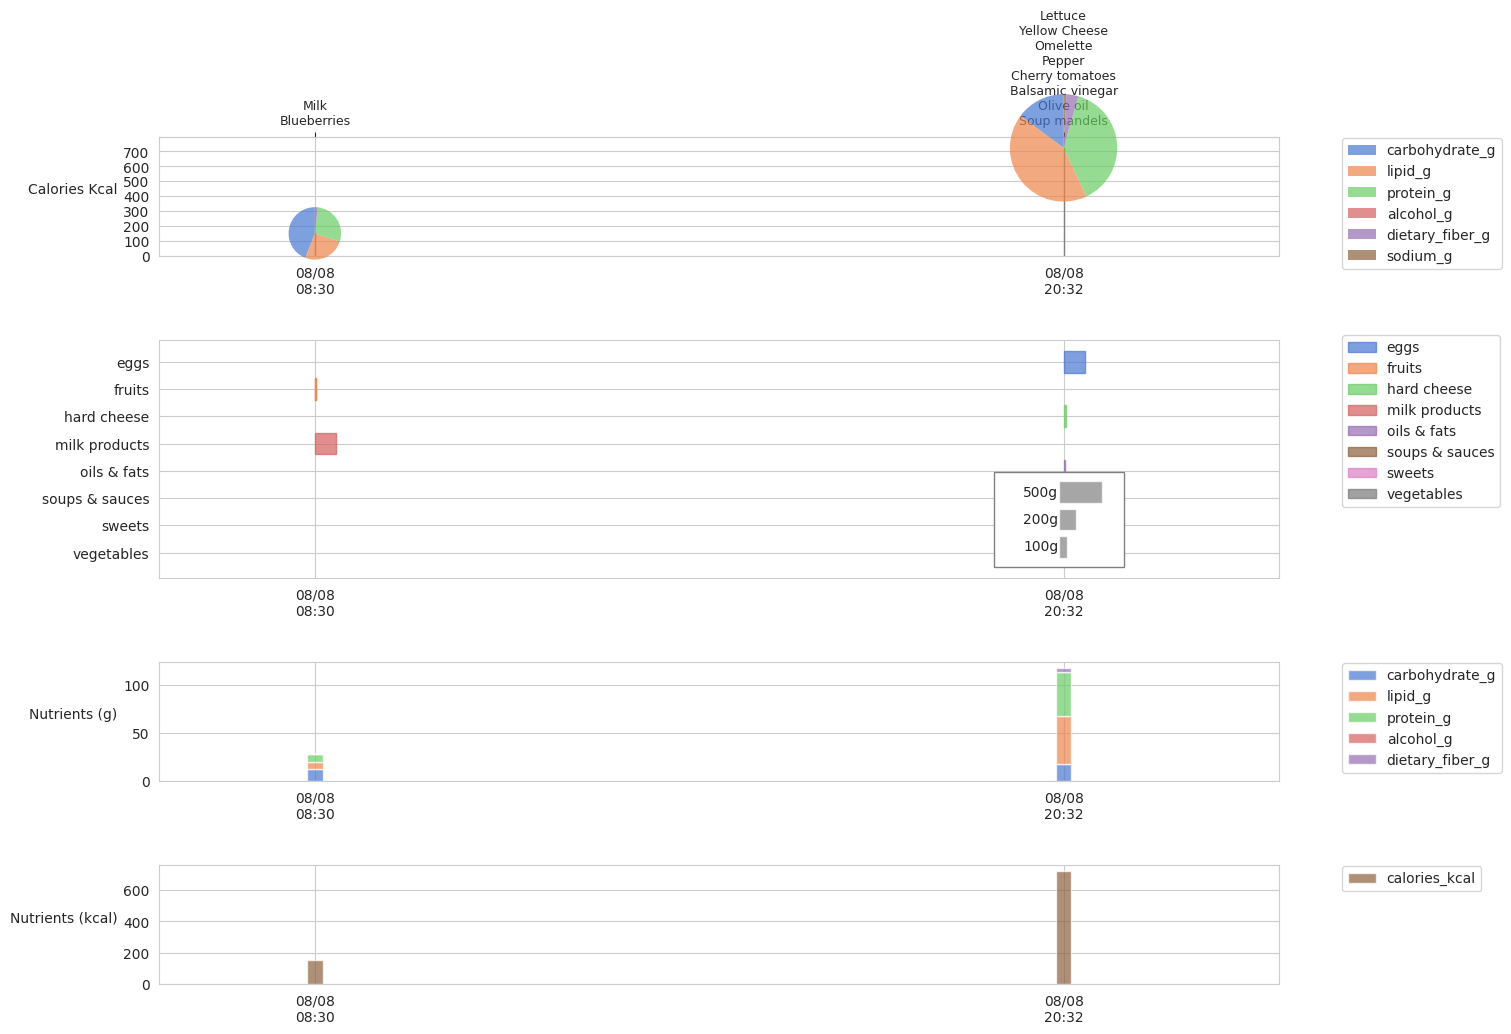

In [9]:
g = TimeSeriesFigure(figsize=(14, 7))

time_range = ('2022-08-08 6:00', '2022-08-09 0:00')
# Each call to the plot() methods adds a new time-synced subplot to the figure
g.plot(plot_nutrient_lollipop, events_df, size_scale=50,
       time_range=time_range,
       name='diet_pie')
g.plot(plot_meals_hbars, events_df,
       time_range=time_range,
       name='diet_meals', height=2)
g.plot(plot_nutrient_bars, events_df,
       time_range=time_range,
       label=None, n_axes=2, nut_exclude=['sodium'],
       name='diet_bars')
g.set_axis_padding(0.07)

# Calculate macronutrient distributions

In [13]:
# adding macronutirents features to diet log
def add_macronut_kcal(df):
        df['carbohydrate_kcal'] = df['carbohydrate_g'] * 4
        df['totallipid_kcal'] = df['lipid_g'] * 9
        df['protein_kcal'] = df['protein_g'] * 4
        return df

macro_diet = add_macronut_kcal(events_df_all)

### average nutrients
daily_nutrient = events_df_all.groupby(
    ['participant_id', 'research_stage', 'logging_day']).sum(numeric_only=True)


mean_daily = (daily_nutrient.groupby(
    ['participant_id', 'research_stage']).mean())

macro_daily = mean_daily [['carbohydrate_kcal','totallipid_kcal','protein_kcal', 'calories_kcal']]

macro_daily_perc = (macro_daily
     .assign(carb_perc = lambda x: x.carbohydrate_kcal/x.calories_kcal)
    .assign(fat_perc = lambda x: x.totallipid_kcal/x.calories_kcal)
    .assign(protein_perc = lambda x: x.protein_kcal/x.calories_kcal)
            )

macro = macro_daily_perc[['carb_perc', 'fat_perc', 'protein_perc']].query('carb_perc < 1 & fat_perc < 1 & protein_perc < 1')

Text(0.5, 1.0, 'Distribution of macronutrients in the diet data')

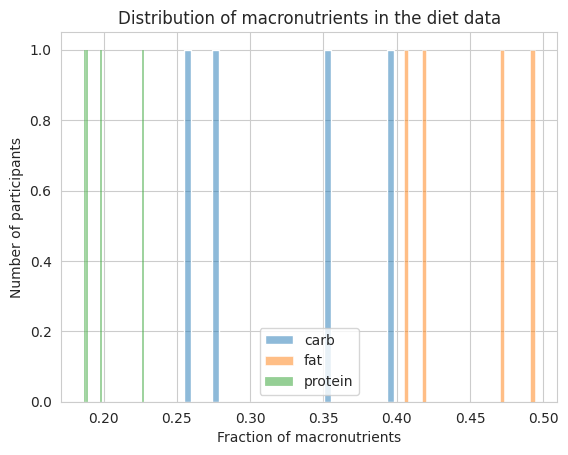

In [14]:
sns.histplot(macro['carb_perc'], kde=False, bins=30, alpha=0.5, label='carb')
sns.histplot(macro['fat_perc'], kde=False, bins=30, alpha=0.5, label='fat')
sns.histplot(macro['protein_perc'], kde=False, bins=30, alpha=0.5, label='protein')

plt.legend()
plt.xlabel('Fraction of macronutrients')
plt.ylabel('Number of participants')
plt.title('Distribution of macronutrients in the diet data')

# Combine diet and CGM

The `pheno-utils` package inlcudes a mult-dataset plot that integrates diet logging with CGM and sleep data.

In [15]:
from pheno_utils.diet_plots import plot_diet_cgm_sleep

In [24]:
pid, rs, aidx = 2578644992, '00_00_visit', 0

try:
    diet = PhenoLoader('diet_logging', base_path='s3://pheno-synthetic-data/data').load_bulk_data(
        'diet_logging_events', research_stage=rs)
except:
    print('No diet data available')
    diet = None
try:
    cgm = PhenoLoader('cgm', base_path='s3://pheno-synthetic-data/data').load_bulk_data('cgm_time_series')
except:
    print('No CGM data available')
    cgm = None

/home/ec2-user/miniconda3/lib/python3.11/site-packages/pheno_utils/pheno_loader.py:621: UserWarning: Error joining research_stage: columns overlap but no suffix specified: Index(['sex'], dtype='object')
  warnings.warn(f'Error joining research_stage: {e}')
/home/ec2-user/miniconda3/lib/python3.11/site-packages/pheno_utils/pheno_loader.py:641: UserWarning: No date field found
  warnings.warn(f'No date field found')
/home/ec2-user/miniconda3/lib/python3.11/site-packages/pheno_utils/pheno_loader.py:525: UserWarning: Fields not found: ['collection_date']
  warnings.warn(f'Fields not found: {not_found}')


/home/ec2-user/miniconda3/lib/python3.11/site-packages/pheno_utils/timeseries_plots.py:194: UserWarning: No axis found with name 'sleep_channels'
  warnings.warn(f"No axis found with name '{a}'")


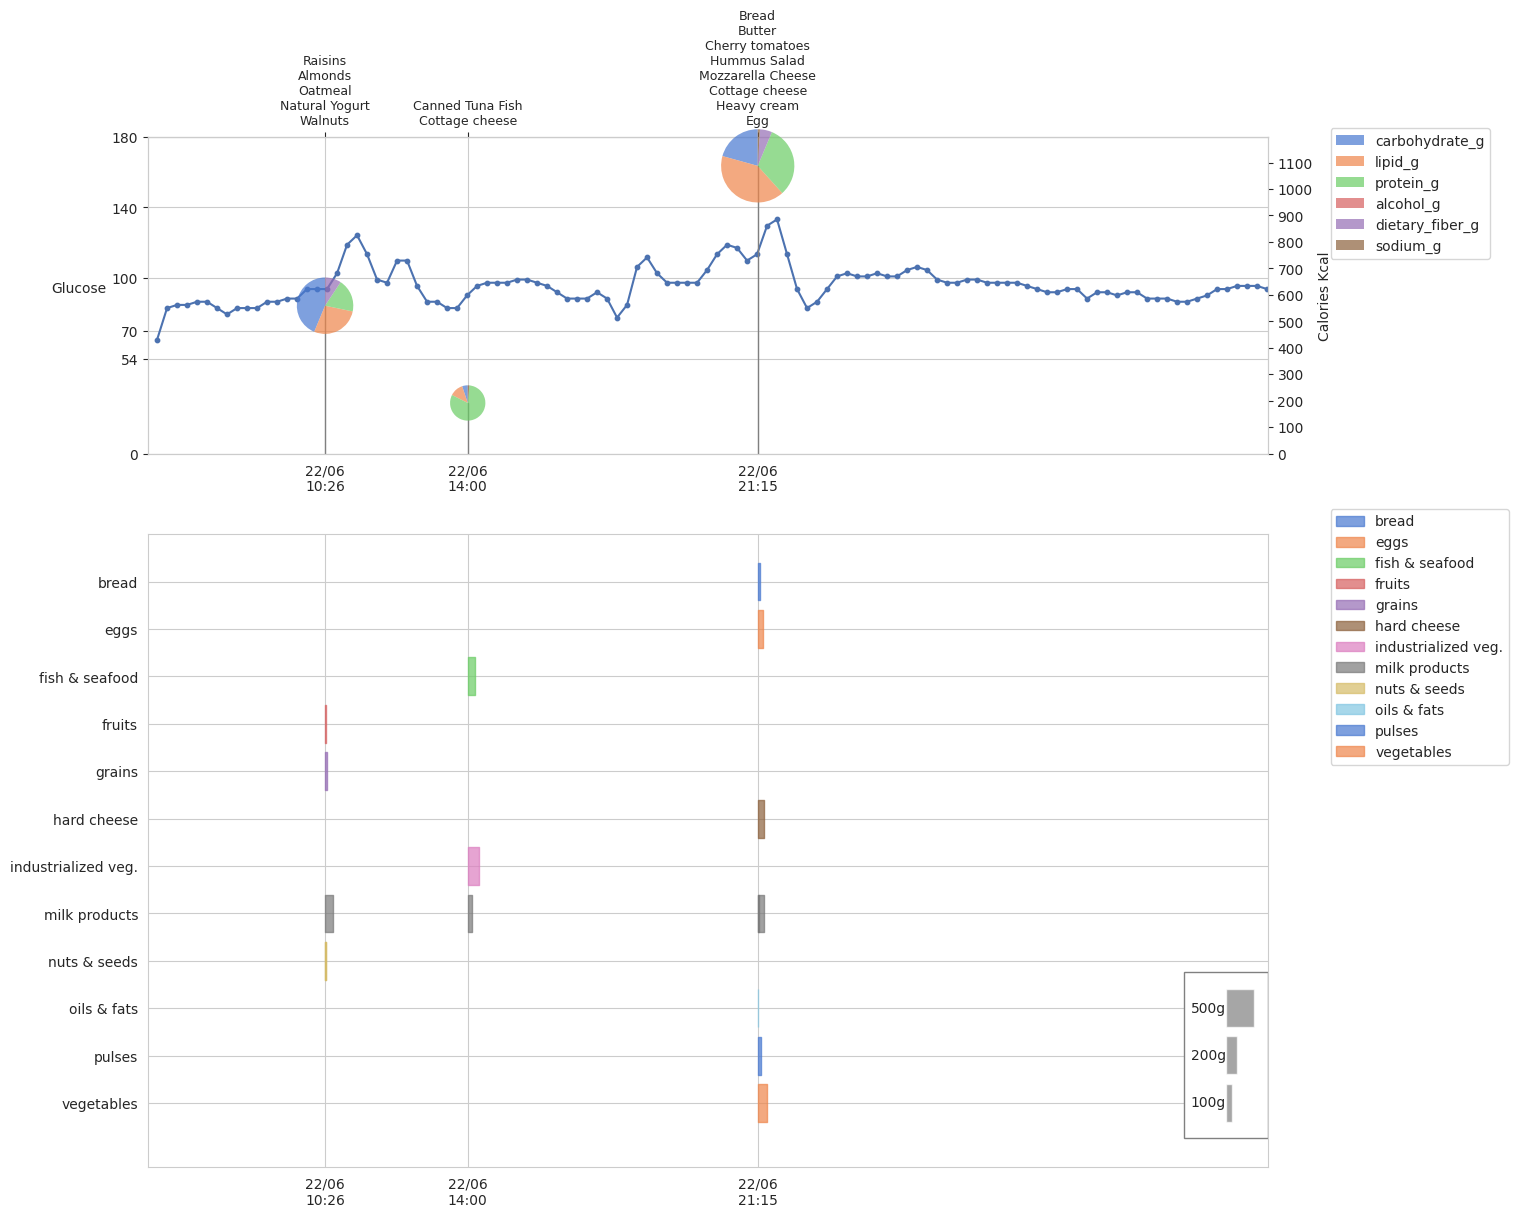

In [26]:
time_range = ('2020-06-22 6:00', '2020-06-23 10:00')
plot_diet_cgm_sleep(diet, cgm, None, None, time_range=time_range)